# Data Analysis and Data Science
## Be curious about the data 

By: Mateusz Checinski
<br>For: BIM6065-65

<hr style="border:1px solid black"> </hr>


**Student Name**: Mateusz Checinski

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 3rd, noon to hand-in your Notebook.

## Python Libraries

Import the Pandas, and Seaborn

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(9, 4)})
sns.set_theme(context="notebook", style="white", palette="Set2")

## Get the data [8 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [3]:
## Define variable with file name
bc = "breast_cancer_metametric.tsv"

In [4]:
## Read ans save data into variable as a dataframe
data = pd.read_table("/u/checinsm/breast_cancer_metametric.tsv")

## Explore the data [12 pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [5]:
data.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


In [6]:
print(data.shape[0], "samples a.k.a patients")
print(data.shape[1], "variables")

1104 samples a.k.a patients
14 variables


***
2. How many age groups are considered?

In [7]:
print((data.loc[:, "AGE_GROUP"].nunique()), "age groups")

6 age groups


***
3. What is the mean overall survival (in month)?

In [47]:
print(round(data["OS_MONTHS"].mean(), 0), "months")

126.0 months


***
4. What is the highest mutation count?

In [9]:
print((data["MUTATION_COUNT"].max()), " mutations")

46.0  mutations


***
5. How large is the smallest tumor?

In [10]:
print((data["TUMOR_SIZE"].min()), " cm")

1.0  cm


***
6. What are the grades considered in the dataset?

In [11]:
print("Grades:", (data.loc[:,"GRADE"].unique()))

Grades: [3. 2. 1.]


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [12]:
print("Median NPI: ", (data["NPI"].median()))

Median NPI:  4.046


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [13]:
print("Chemotherapy: ", data.loc[:, "CHEMOTHERAPY"].unique())
print("Hormone Therpay: ", data.loc[:, "HORMONE_THERAPY"].unique())
print("Radio therapy: ", data.loc[:, "RADIO_THERAPY"].unique())
print("Breast surgery: ", data.loc[:, "BREAST_SURGERY"].unique())

Chemotherapy:  [1. 0.]
Hormone Therpay:  [1. 0.]
Radio therapy:  [1. 0.]
Breast surgery:  [0. 1.]


In [14]:
print("8.b) 1 means patient has had the respective treatment, 0 means they have not")
print("This is based on the notation: 1 = true, 0 = false")

8.b) 1 means patient has had the respective treatment, 0 means they have not
This is based on the notation: 1 = true, 0 = false


***
10. How many patients in the dataset have had breast surgery?

In [15]:
print((data.loc[data.BREAST_SURGERY == 1.0, data.columns.values[3]].count()), "patients have had breast surgery")

468 patients have had breast surgery


## Visualize the data [30 pts pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [16]:
import seaborn as sns

In [17]:
data.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


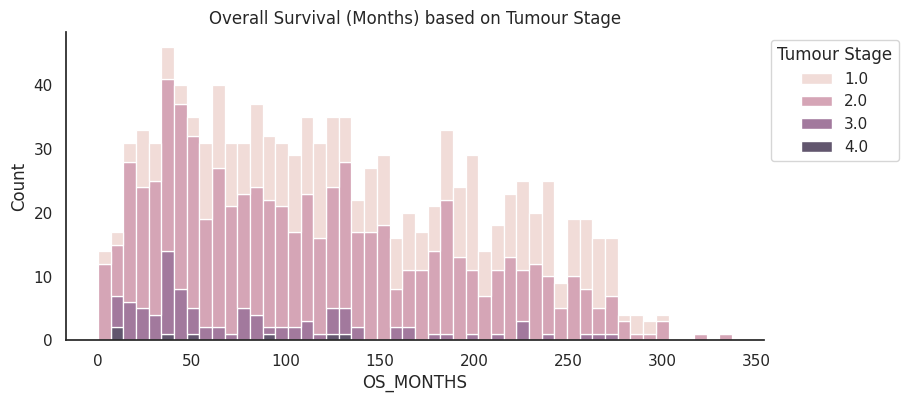

In [22]:
p = sns.histplot(data, x="OS_MONTHS", bins=50, hue="TUMOR_STAGE", multiple="stack")
p.set_title("Overall Survival (Months) based on Tumour Stage")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title="Tumour Stage", frameon=True)
sns.despine()

In [29]:
### Interpretation
print("-Indeed, it seems that the the distribution of the overall survival (OS_MONTHS)")
print(" differs from one tumor stage to another.")
print(" ")
print("-This is because all 4 tumour stages seem to be distributed more")
print("towards the beginning of the graph, closer to the 50-100 OS_Months values.")
print(" ")
print("-This is even more apparent with tumour stages 3 and 4 which are much more visioble")
print("at the mentioned values and especially tumour stage 4 does not appear after 150 OS_MONTHS.")

-Indeed, it seems that the the distribution of the overall survival (OS_MONTHS)
 differs from one tumor stage to another.
 
-This is because all 4 tumour stages seem to be distributed more
towards the beginning of the graph, closer to the 50-100 OS_Months values.
 
-This is even more apparent with tumour stages 3 and 4 which are much more visioble
at the mentioned values and especially tumour stage 4 does not appear after 150 OS_MONTHS.


***
You are now interested in the relationship between the overall survival and the other variables measured. Given your knowledge of the dataset, make an hypothesis that considered the overall survival.

Explore the dataset and generate a least one figure that validate or invalidate your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

In [41]:
print("Hypothesis: The survival rate (OS_Months) is correlated with mutation count.")
print("            (A high mutation count would result in lower survival rate)")

Hypothesis: The survival rate (OS_Months) is correlated with mutation count.
            (A high mutation count would result in lower survival rate)


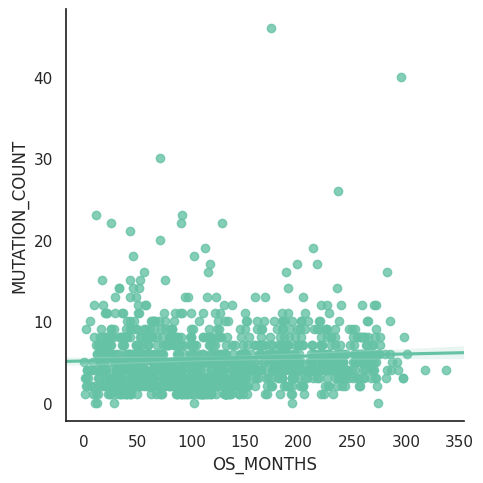

In [43]:
### Figure
sns.lmplot(data, x="OS_MONTHS", y="MUTATION_COUNT", truncate=False)
sns.despine()

In [44]:
### Interpretation
print("-Interpretetion of graph: This does not seem to be the case as the line of best fit is flat")
print(" showing little correlation. The graph is not steep with a negative slope as hypothesised.")

-Interpretetion of graph: This does not seem to be the case as the line of best fit is flat
 showing little correlation. The graph is not steep with a negative slope as hypothesised.
